In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import yaml
from operator import itemgetter
import pandas as pd
import os

import figures

# Diagram for n=2

In [64]:
folder = "/home/marine/ownCloud/Research/Projets/mush_projet/data_paper/all_data_n2/"
data_n2 = figures.diagram_data(folder, "all_data_n2.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diagram_n2/'

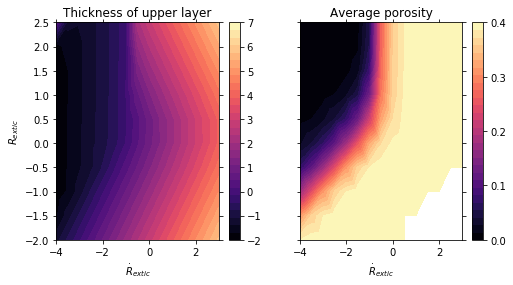

In [3]:
figures.diagram(data_n2)        
plt.savefig(folder+"scaling_contourf.pdf")

## Diagram with pseudo-random values

In [62]:
folder = "/home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diag_random_n2/"
data_n2 = figures.diagram_data(folder, "all_data_random.csv")
print(data_n2.shape)

Looking through folder /home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diag_random_n2/
no boundary for R 225.20695197969678, dot_R 0.00010215231090617031: folder /home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diag_random_n2//exp_1.00e+00_coeff_1.02e-04_radius_2.25e+02
no boundary for R 507.61706729140434, dot_R 0.0002586102727965145: folder /home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diag_random_n2//exp_1.00e+00_coeff_2.59e-04_radius_5.08e+02
no boundary for R 492.5096123438822, dot_R 9.535110716620045e-05: folder /home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diag_random_n2//exp_1.00e+00_coeff_9.54e-05_radius_4.93e+02
oups, not a folder: /home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diag_random_n2//all_data_random_n2.csv
oups, not a folder: /home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diag_random_n2//all_data_random.csv
oups, not a folder: /home/marine/ownCloud/Research/Projets/mush_projet/d

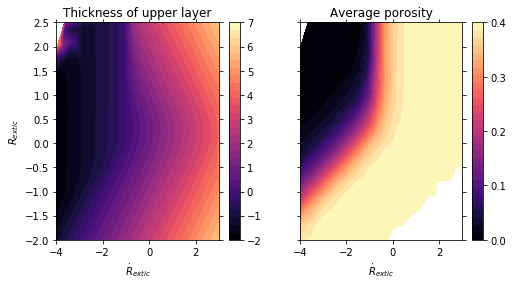

In [63]:
figures.diagram(data_n2)

# Diagram n=3

In [65]:
folder = "/home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diag_random_n3.0_test/"
data_n3 = figures.diagram_data(folder, "diag_random.csv")

Looking through folder /home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diag_random_n3.0_test/
oups, not a folder: /home/marine/ownCloud/Research/Projets/mush_projet/data_paper/diag_random_n3.0_test//diag_random.csv


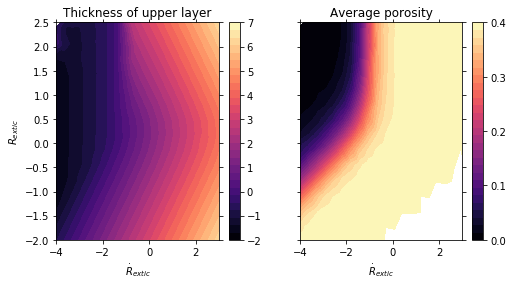

In [66]:
figures.diagram(data_n3)  

# comparison final state n=2 or n=3

2.0, 1.0
delta is 21.621
2.0, 0.1
delta is 0.73415
3.0, 0.1
delta is 3.7894
3.0, 0.01
delta is 0.25251
3.0, 1.0
delta is 59.966
2.0, 0.01
delta is 0.12011


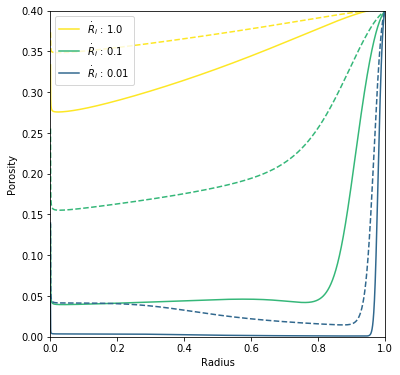

In [8]:
folder_base = "/home/marine/ownCloud/Research/Projets/mush_projet/data_paper/comparaison_n2_n3/"

folders = os.listdir(folder_base)
folders = [x  for x  in folders if x[0]=="n"]
fig2, ax2 = plt.subplots(figsize=[6,6])


pvalues = [0, -1, -2, -3]
def norm(pval):
    return (pval - pvalues[-1]) / float(pvalues[0] - pvalues[-1])

for i_folder, folder in enumerate(folders):
        #print(folder)
        list_files = os.listdir(folder_base+folder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = folder_base+folder + "/" + file
            elif file[-9:] == ".timestep":
                _name = folder_base+folder + "/" + file
                _time = figures.find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                parameter_file = folder_base+folder + "/" + file
        with open(parameter_file, 'r') as stream:
            try:
                options = yaml.safe_load(stream)
            except yaml.YAMLError as exc:
                print(exc)
                
        try:
            n = options["n"]
        except KeyError:
            n = 2
          
        val = np.log10(options["coeff_velocity"])
        if n == 2: 
            ligne = "-"
            legend = "$\dot R_i$ : {}".format(options["coeff_velocity"])
        else: 
            ligne = "--"
            legend = ""
        
        
        colors = plt.cm.viridis(norm(val))
        name_max = max(timesteps.items(), key=itemgetter(1))[0]
        data = pd.read_csv(name_max, sep=" ")
        dr = data["radius"][1]-data["radius"][0]
        ax2.plot((data["radius"] + dr / 2.)/options["Ric_adim"], data["porosity"], ligne, color=colors, label=legend)
        
        stat = pd.read_csv(file_stat, sep=" ", index_col=False)
        stat = stat["thickness_boundary"]
        print("{}, {}".format(n, options["coeff_velocity"]))
        print("delta is {}".format(stat.tail(1).item()))

ax2.set_xlim([0, 1])
ax2.set_ylim([0, 0.4])
ax2.set_ylabel("Porosity")
ax2.set_xlabel("Radius")
ax2.legend(loc=2)




# No growth

/home/marine/anaconda3/envs/gyic36/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


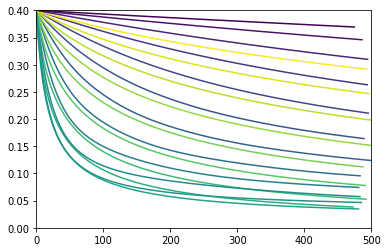

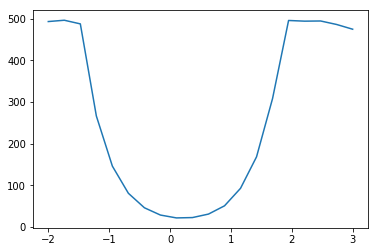

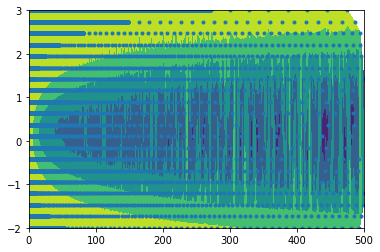

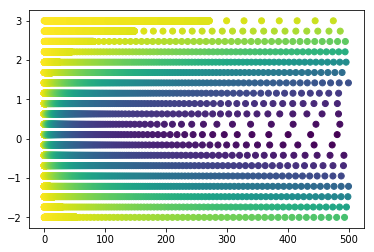

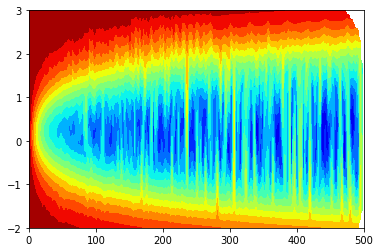

In [73]:
folder_base = "/home/marine/ownCloud/Research/Projets/mush_projet/data_paper/no_growth_n3/"
folders = os.listdir(folder_base)

fig, ax = plt.subplots()

columns = ["Ric_adim", "time"]
df = pd.DataFrame(columns=columns)

columns = ["Ric_adim", "sum_phi", "time"]
data_all = pd.DataFrame(columns=columns)

def add_value(df, ric, time):
        df_add = pd.DataFrame({"Ric_adim":[ric], "time": time})
        df = df.append(df_add)
        return df

pvalues = [-2, 3]
def norm(pval):
    return (pval - pvalues[-1]) / float(pvalues[0] - pvalues[-1])

for i_folder, folder in enumerate(folders):
        #print(folder)
        list_files = os.listdir(folder_base+folder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = folder_base+folder + "/" + file
            elif file[-9:] == ".timestep":
                _name = folder_base+folder + "/" + file
                _time = figures.find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                parameter_file = folder_base+folder + "/" + file
        with open(parameter_file, 'r') as stream:
            try:
                options = yaml.safe_load(stream)
            except yaml.YAMLError as exc:
                print(exc)
        val = np.log10(options["Ric_adim"])
        co = plt.cm.viridis(norm(val))
        data = pd.read_csv(file_stat, sep=" ", index_col=False)
        ax.plot(data['time'], data["sum_phi"], color=co)
        
        save_data = data[["time", "sum_phi"]].copy()
        save_data["Ric_adim"] = options["Ric_adim"]
        data_all = data_all.append(save_data)
        
        data["phi0.3"] =  np.abs(data["sum_phi"]-0.2)
        time = data["time"].iloc[data["phi0.3"].idxmin()]
        
        df = add_value(df, options["Ric_adim"], time)
        
ax.set_xlim([0, 500])
ax.set_ylim([0, 0.4])

fig, ax = plt.subplots()
df.sort_values(by="Ric_adim",  inplace=True)
ax.plot(np.log10(df["Ric_adim"]), df["time"])

fig, ax = plt.subplots()
time = data_all["time"].values
Ric = data_all["Ric_adim"].values
phi = data_all["sum_phi"].values
ax.tricontourf(time, np.log10(Ric), phi, 5)
ax.plot(time, np.log10(Ric),'.')



fig, ax = plt.subplots()
time = data_all["time"].values
Ric = data_all["Ric_adim"].values
phi = data_all["sum_phi"].values
#ax.tricontourf(time, np.log10(Ric), phi, 5)
ax.scatter(time, np.log10(Ric),c=phi)

fig, ax =plt.subplots()
xi = np.linspace(0, 500, 200)
yi = np.linspace(-2, 3., 50)
from scipy.interpolate import griddata
#zi = griddata(time, np.log10(Ric), phi, xi, yi, interp='linear')
zi = griddata((time, np.log10(Ric)), phi, (xi[None,:], yi[:,None]), method='linear')
ax.contourf(xi,yi,zi,15,cmap=plt.cm.jet)

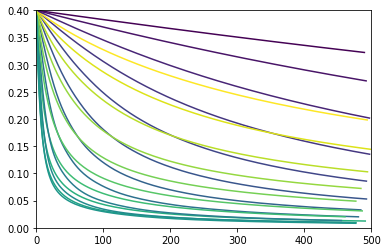

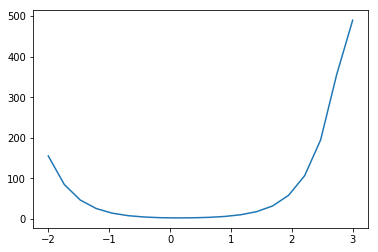

In [35]:
folder_base = "/home/marine/ownCloud/Research/Projets/mush_projet/data_paper/no_growth_paramOK/"
folders = os.listdir(folder_base)

fig, ax = plt.subplots()

columns = ["Ric_adim", "time"]
df = pd.DataFrame(columns=columns)

def add_value(df, ric, time):
        df_add = pd.DataFrame({"Ric_adim":[ric], "time": time})
        df = df.append(df_add)
        return df

pvalues = [-2, 3]
def norm(pval):
    return (pval - pvalues[-1]) / float(pvalues[0] - pvalues[-1])

for i_folder, folder in enumerate(folders):
        #print(folder)
        list_files = os.listdir(folder_base+folder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = folder_base+folder + "/" + file
            elif file[-9:] == ".timestep":
                _name = folder_base+folder + "/" + file
                _time = figures.find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                parameter_file = folder_base+folder + "/" + file
        with open(parameter_file, 'r') as stream:
            try:
                options = yaml.safe_load(stream)
            except yaml.YAMLError as exc:
                print(exc)
        val = np.log10(options["Ric_adim"])
        co = plt.cm.viridis(norm(val))
        data = pd.read_csv(file_stat, sep=" ", index_col=False)
        ax.plot(data['time'], data["sum_phi"], color=co)
        
        data["phi0.3"] =  np.abs(data["sum_phi"]-0.3)
        time = data["time"].iloc[data["phi0.3"].idxmin()]
        
        df = add_value(df, options["Ric_adim"], time)
        
ax.set_xlim([0, 500])
ax.set_ylim([0, 0.4])

fig, ax = plt.subplots()
df.sort_values(by="Ric_adim",  inplace=True)
ax.plot(np.log10(df["Ric_adim"]), df["time"])

# Supercooling 

Looking through folder /home/marine/ownCloud/Research/Projets/mush_projet/data_paper/supercooling_3/
oups, not a folder: /home/marine/ownCloud/Research/Projets/mush_projet/data_paper/supercooling_3//data.csv


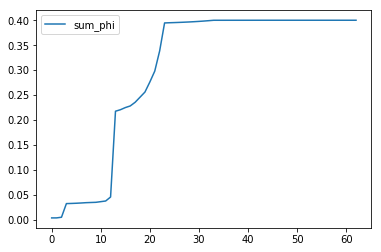

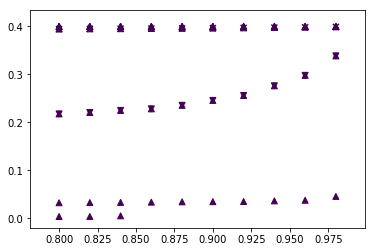

In [59]:
folder = "/home/marine/ownCloud/Research/Projets/mush_projet/data_paper/supercooling_3/"

def add_value(df, ric, coeff, exp, phi, delta, r0_supercooling):
    df_add = pd.DataFrame({"Ric_adim":[ric], "coeff_velocity":[coeff], "exp":[exp], "sum_phi":[phi], "delta":[delta], "r0_supercooling":[r0_supercooling]})
    df = df.append(df_add, ignore_index=True)
    return df

list_subfolder = os.listdir(folder)
print("Looking through folder {}".format(folder))

columns = ["Ric_adim", "coeff_velocity", "exp", "sum_phi", "delta", "r0_supercooling"]
df = pd.DataFrame(columns=columns)

for subfolder_name in list_subfolder:
            if os.path.isdir(folder + "/" + subfolder_name):
                list_files = os.listdir(folder+"/"+subfolder_name)
                for file in list_files:
                    if file[-14:] == "statistics.txt":
                        file_stat = folder + "/" + subfolder_name + "/" + file
                    if file[-5:] == ".yaml":
                        with open(folder + "/" + subfolder_name + "/" + file, 'r') as stream:
                            try:
                                param = yaml.safe_load(stream)
                                #print(param)
                            except yaml.YAMLError as exc:
                                print(exc)
                data = pd.read_csv(file_stat, sep=" ", index_col=False)
                if data["radius"].iloc[-1] < 0.99*param["Ric_adim"]:
                    remarks = "run ended before completion. Radius {}/{}".format(data["radius"], param["Ric_adim"])
                else:
                    remarks = ""
                remarks=remarks+subfolder_name
                if data["thickness_boundary"].iloc[-1] < 1e-12:
                    pass #print("no boundary for {}, {}".format(param["Ric_adim"], param['coeff_velocity']))
                df = add_value(df, param["Ric_adim"], param['coeff_velocity'], param['growth_rate_exponent'], 
                            data["sum_phi"].iloc[-1], data["thickness_boundary"].iloc[-1], param["r0_supercooling"])
            else: print("oups, not a folder: {}".format(folder + "/" + subfolder_name))
df.to_csv(folder+"data.csv")

df = df.sort_values(by=["Ric_adim", 'coeff_velocity', "sum_phi"]).reset_index(drop=True)

#print(df[df["sum_phi"]<0.3])

df.plot(y="sum_phi", use_index=True)

coeff_1 = df[df["coeff_velocity"]==1.]
coeff_01 = df[df["coeff_velocity"]==0.1]
coeff_10 = df

coeff = [coeff_1, coeff_01, coeff_10]
markers = ["x", "v","^"]
fig, ax = plt.subplots()
for mark, coeff_ in zip(markers, coeff):

    ax.scatter(coeff_["r0_supercooling"]/coeff_["Ric_adim"], coeff_["sum_phi"], 
               c= np.log(coeff_["Ric_adim"])/np.log(10.), 
               marker=mark)

In [12]:
3

3